<a href="https://colab.research.google.com/github/vp465/INF502/blob/main/extra_HW.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [72]:
from bs4 import BeautifulSoup as soup
from urllib.request import Request,urlopen as uReq
import pandas as pd 
import csv
import seaborn as sns

In [73]:
def web_scrape():
    my_url='https://en.wikipedia.org/wiki/List_of_countries_and_dependencies_by_population_density'
    uClient=uReq(my_url)
    page_html=uClient.read()
    uClient.close()
    page_soup=soup(page_html,"html.parser")
    table=page_soup.find_all('tbody')[0]
    main_table=table.find_all(['th','td'])
    c=1
    with open('world_table.csv', 'w', newline='') as file:
        writer = csv.writer(file)
        writer.writerow(['Country name','Area (km^2)','Area (mi^2)','Population','d1','d2','d3'])
        for i in main_table[9:]:
            if(c==1):
                country=i.text
            elif(c==2):
                area1=i.text
            elif(c==3):
                area2=i.text
            elif(c==4):
                popu=i.text
            elif(c==5):
                d1=i.text
            elif(c==6):
                d2=i.text
            elif(c==7):
                d3=i.text
                writer.writerow([country,area1,area2,popu,d1,d2,d3])
                c=0
            c=c+1

In [74]:
web_scrape()

In [75]:
df=pd.read_csv('world_table.csv',encoding = 'ISO-8859-1')

In [76]:
 df

,Country name,Area (km^2),Area (mi^2),Population,d1,d2,d3
0,Â Macau (China)\n,"686,607",33,13,"20,806","53,888",2021\n
1,Â Monaco\n,"36,686",2,1,"18,343","47,508",2021\n
2,Â Singapore\n,"5,453,600",716,276,"7,617","19,727",2021\n
3,Â Hong Kong (China)\n,"7,494,578","1,104",426,"6,789","17,582",2021\n
4,Â Gibraltar (BOT)\n,"32,669",6,2,"5,445","14,102",2021\n
...,...,...,...,...,...,...,...
245,Â Mongolia\n,"3,347,782","1,564,116","603,905",2,6,2021\n
246,Western Sahara [note 14]\n,"565,581","266,000","102,703",2,6,2021\n
247,Â Falkland Islands (BOT)\n,"3,764","12,173","4,700",0.3,0.8,2021\n
248,Â Svalbard and Jan Mayen (Norway)\n,"2,939","62,422","24,101.13",0.05,0.12,[34] 1 Sep 2012\n


In [77]:
df.drop(['d1','d2','d3'],axis=1,inplace=True)

In [82]:
df['Country name']=df['Country name'].str.replace('\n','')

In [88]:
indexWorld1 = df[(df['Country name'] == 'Â World (excluding Antarctica)')].index
df.drop(indexWorld1, inplace=True)
indexWorld2 = df[(df['Country name'] == 'Â World (all land)')].index
df.drop(indexWorld2, inplace=True)

In [90]:
df['Area (km^2)']=df['Area (km^2)'].str.replace(",","")
df['Area (mi^2)']=df['Area (mi^2)'].str.replace(",","")
df['Population']=df['Population'].str.replace(",","")

,Country name,Area (km^2),Area (mi^2),Population
0,Â Macau (China),"686,607",33,13
1,Â Monaco,"36,686",2,1
2,Â Singapore,"5,453,600",716,276
3,Â Hong Kong (China),"7,494,578","1,104",426
4,Â Gibraltar (BOT),"32,669",6,2
...,...,...,...,...
245,Â Mongolia,"3,347,782","1,564,116","603,905"
246,Western Sahara [note 14],"565,581","266,000","102,703"
247,Â Falkland Islands (BOT),"3,764","12,173","4,700"
248,Â Svalbard and Jan Mayen (Norway),"2,939","62,422","24,101.13"


In [91]:
df['Area (km^2)'] = pd.to_numeric(df['Area (km^2)'])
df['Area (mi^2)'] = pd.to_numeric(df['Area (mi^2)'])
df['Population'] = pd.to_numeric(df['Population'])

In [92]:
df.dtypes


Country name     object
Area (km^2)       int64
Area (mi^2)       int64
Population      float64
dtype: object

In [ ]:
df.describe()


In [93]:
df.info()
df['Area (km^2)'].mean()
df['Area (mi^2)'].mean()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 248 entries, 0 to 249
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Country name  248 non-null    object 
 1   Area (km^2)   248 non-null    int64  
 2   Area (mi^2)   248 non-null    int64  
 3   Population    248 non-null    float64
dtypes: float64(1), int64(2), object(1)
memory usage: 9.7+ KB


545636.375

In [94]:
df['Population'].mean()


210670.1852016129

             Area (km^2)  Area (mi^2)  Population
Area (km^2)     1.000000     0.459275    0.459275
Area (mi^2)     0.459275     1.000000    1.000000
Population      0.459275     1.000000    1.000000


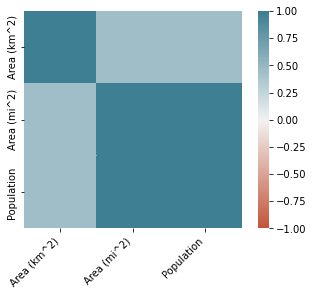

In [95]:
data =df
print(df.corr())
corr = data.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);


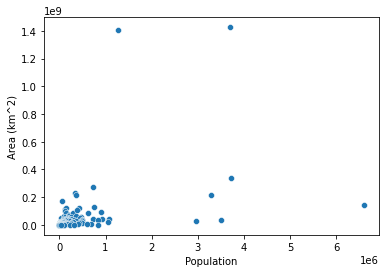

In [96]:
df1=pd.DataFrame()
df1['Population']=df['Population']
df1['Area (km^2)']=df['Area (km^2)']
sns.scatterplot(x="Population", y="Area (km^2)", data=df1)